In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


┌ Info: Precompiling OpenSAFT [7c7805af-46cc-48c9-995b-ed0ed2dc909a]
└ @ Base loading.jl:1273


In this notebook we will try to replicate various figures from S. Dufal _et al._ 's 2015 paper

## Figure 14

In [7]:
# Setting up the model
water      = system(["water"],"SAFTVRMie");

In [8]:
# Get critical point
(T_c_water, p_c_water, v_c_water)                = get_crit_pure(water);

In [9]:
# Get saturation properties for all species
T_water      = range(280, T_c_water, length = 100)

(P_sat_water, v_l_water, v_v_water)                = get_sat_pure(water,T_water);

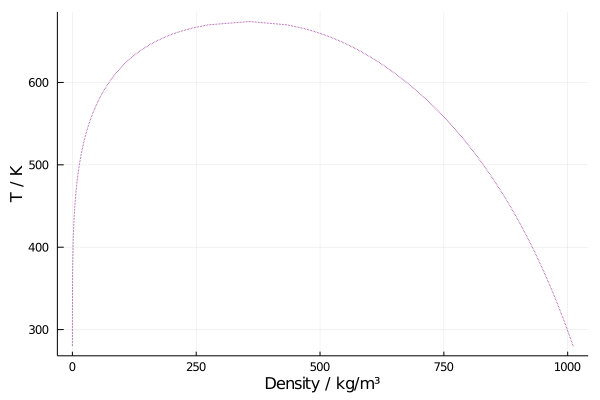

In [10]:
plt = plot(0.018 ./v_l_water, T_water,color=:purple,linestyle=:dot,xlabel="Density / kg/m³",ylabel="T / K", label = "")
plt = plot!(0.018 ./v_v_water, T_water,color=:purple,linestyle=:dot, label = "")
display(plt)

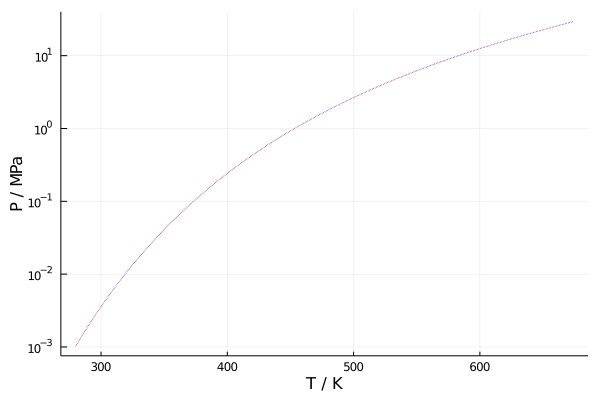

In [11]:
plt = plot(T_water, P_sat_water/1e6,color=:purple,linestyle=:dot,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)

In [12]:
h_vap_water   = get_enthalpy_vap(water,T_water);

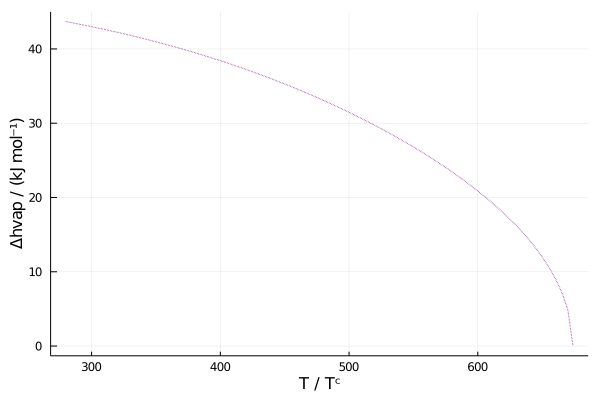

In [13]:
plt = plot(T_water, h_vap_water/1e3,color=:purple,linestyle=:dot,xlabel="T / Tᶜ",ylabel="Δhvap / (kJ mol⁻¹)", label = "")
display(plt)